In [1]:
import tensorflow.compat.v1 as tf
import numpy as np
import tensorflow_datasets as tfds
tf.disable_v2_behavior()


Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
a=np.unique(y_train)
x_train.shape

(60000, 28, 28)

In [4]:
x_train
newxtrain=x_train.reshape(x_train.shape[0],(x_train.shape[1]*x_train.shape[2]))

In [5]:
newxtrain.shape
newtest=x_test.reshape(x_test.shape[0],(x_test.shape[1]*x_test.shape[2]))
newtest.shape

(10000, 784)

In [6]:
newxtrain.shape,newtest.shape,y_train.shape,len(np.unique(y_test))

((60000, 784), (10000, 784), (60000,), 10)

In [7]:
newtrainy=np.zeros((len(x_train),len(np.unique(y_train))))
newtrainy.shape

(60000, 10)

In [8]:
for i in range(len(y_train)):
    k=y_train[i]
    newtrainy[i,k]=1

In [9]:
newtesty=np.zeros((len(newtest),len(np.unique(y_test))))

In [10]:
for i in range(len(y_test)):
    k=y_test[i]
    newtesty[i,k]=1

In [11]:
newtesty

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [12]:
newtrainy

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [13]:
newxtrain.shape,newtest.shape,newtrainy.shape,newtesty.shape

((60000, 784), (10000, 784), (60000, 10), (10000, 10))

In [14]:
mnist=tfds.load(name='mnist')

In [15]:
type(mnist)

dict

In [16]:
mnist

{'train': <PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>,
 'test': <PrefetchDataset element_spec={'image': TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), 'label': TensorSpec(shape=(), dtype=tf.int64, name=None)}>}

In [17]:
tr,te=mnist['train'],mnist['test']

In [18]:
tr1=tfds.as_numpy(tr)
te1=tfds.as_numpy(te)

In [19]:
tr1,te1

(<tensorflow_datasets.core.dataset_utils._IterableDataset at 0x232b61fe770>,
 <tensorflow_datasets.core.dataset_utils._IterableDataset at 0x232ed4cab90>)

In [20]:
newtrainy[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [21]:
y_train[0]

5

In [22]:
from matplotlib import pyplot as plt

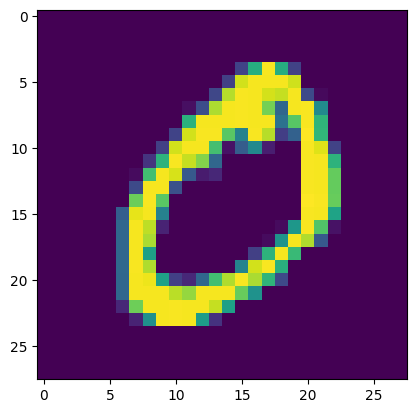

In [23]:
first_img=newxtrain[1]
# first_img
first_img=np.array(first_img,dtype='float')
first_img=first_img.reshape((28,28))
plt.imshow(first_img)
plt.show()

In [24]:
print(tf.compat.v1.random_normal([756,256]))

Tensor("random_normal:0", shape=(756, 256), dtype=float32)


In [25]:
n_input=784
n_hidden1=256
n_hidden2=256
n_class=10
weight={
    'h1':tf.Variable(tf.compat.v1.random_normal([n_input,n_hidden1])),
    'h2':tf.Variable(tf.compat.v1.random_normal([n_hidden1,n_hidden2])),
    'h3':tf.Variable(tf.compat.v1.random_normal([n_hidden2,n_class]))

}
bias={
    'h1':tf.Variable(tf.compat.v1.random_normal([n_hidden1])),
    'h2':tf.Variable(tf.compat.v1.random_normal([n_hidden2])),
    'h3':tf.Variable(tf.compat.v1.random_normal([n_class]))
}

In [26]:
def forward_propagation(x,weight,bias):
    layer1=tf.add(tf.matmul(x,weight['h1']),bias['h1'])
    out_layer1=tf.nn.relu(layer1)
    layer2=tf.add(tf.matmul(out_layer1,weight['h2']),bias['h2'])
    out_layer2=tf.nn.relu(layer2)
    output=tf.add(tf.matmul(out_layer2,weight['h3']),bias['h3'])
    out_output=tf.nn.relu(output)
    return output

In [27]:

x=tf.placeholder('float',[None,n_input])
y=tf.placeholder(tf.int32,[None,n_class])
pred=forward_propagation(x,weight,bias)

In [28]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [43]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)
ses=tf.Session()
ses.run(tf.global_variables_initializer())

In [44]:
batch_size=200
# num_batch=int(len(newxtrain)/batch_size)
# print(num_batch)
# batch_x=newxtrain[:batch_size,:]
# batch_y=newtrainy[:batch_size,:]
# print(batch_x.shape,batch_y.shape)
# len(newxtrain)
for i in range(10):
    num_batch=int(len(newxtrain)/batch_size)
    x1=0
    totalcost=0
    for j in range(num_batch):
        batch_x=newxtrain[x1:x1+batch_size,:]
        batch_y=newtrainy[x1:x1+batch_size,:]
        c,_=ses.run([cost,optimize],feed_dict={x:batch_x,y:batch_y})
        totalcost=totalcost+c
        x1=x1+batch_size
    predict=tf.argmax(pred,1)
    correc_labels=tf.argmax(y,1)
    pred_val=ses.run(predict,feed_dict={x:newxtrain})
    true_value=ses.run(correc_labels,feed_dict={y:newtrainy})
    correct_pred=ses.run(tf.equal(pred_val,true_value))
    print("no of correct : ",correct_pred.sum())
    print(totalcost)
        

no of correct :  56102
5098243.373550415
no of correct :  57427
825209.0908203125
no of correct :  58016
412703.9271697998
no of correct :  57943
238227.82531690598
no of correct :  58542
172603.7282447815
no of correct :  59036
134279.9704823494
no of correct :  58581
117601.35282593966
no of correct :  59070
111195.99708783627
no of correct :  58984
101943.70466470718
no of correct :  59189
105023.9019536972


In [150]:
# for i in range(10):
#     predict=tf.argmax(pred,1)
#     correc_labels=tf.argmax(y,1)
#     pred_val=ses.run(predict,feed_dict={x:newxtrain})
#     true_value=ses.run(correc_labels,feed_dict={y:newtrainy})
#     # print(pred_val.shape,true_value.shape)
#     correct_pred=ses.run(tf.equal(pred_val,true_value))
#     print("no of correct : ",correct_pred.sum())
#     c,_=ses.run([cost,optimize],feed_dict={x:newxtrain,y:newtrainy})
#     print(c)

no of correct :  6957
43035.87
no of correct :  7307
36898.414
no of correct :  7483
34687.094
no of correct :  7542
34607.86
no of correct :  7556
34894.25
no of correct :  7622
34435.7
no of correct :  7683
32788.66
no of correct :  7793
30089.824
no of correct :  7971
26910.115
no of correct :  8132
23837.252
no of correct :  8288
21322.34
no of correct :  8413
19493.943
no of correct :  8496
18438.14
no of correct :  8534
17892.385
no of correct :  8563
17568.803
no of correct :  8597
17276.148
no of correct :  8608
16849.102
no of correct :  8636
16246.374
no of correct :  8677
15515.939
no of correct :  8731
14735.13
no of correct :  8775
13953.022
no of correct :  8818
13232.385
no of correct :  8864
12569.609
no of correct :  8888
11942.541
no of correct :  8914
11323.799
no of correct :  8959
10747.922
no of correct :  8988
10234.277
no of correct :  9018
9804.079
no of correct :  9038
9452.135
no of correct :  9053
9151.701
no of correct :  9064
8871.968
no of correct :  9077

In [136]:
def correct_ans(pred,y):
    sess=tf.Session()
    

In [45]:
predict=tf.argmax(pred,1)
correc_labels=tf.argmax(y,1)
pred_val=ses.run(predict,feed_dict={x:newtest})
true_value=ses.run(correc_labels,feed_dict={y:newtesty})
print(pred_val.shape,true_value.shape)
correct_pred=ses.run(tf.equal(pred_val,true_value))
print(correct_pred.sum())

(10000,) (10000,)
9595


In [119]:
# batch_size=100
# for i in range(10):
#     num_batch=int(newxtrain.size/batch_size)
#     x1=0
#     totalcost=0
#     for j in range(num_batch):
#         x1=x1+batch_size
#         batch_x=newxtrain[:batch_size,]
#         batch_y=newtrainy[:batch_size,]
#         c,_=ses.run([cost,optimize],feed_dict={x:newxtrain,y:newtrainy})
#         totalcost=totalcost+c
#     predict=tf.argmax(pred,1)
#     correc_labels=tf.argmax(y,1)
#     pred_val=ses.run(predict,feed_dict={x:newxtrain})
#     true_value=ses.run(correc_labels,feed_dict={y:newtrainy})
#     correct_pred=ses.run(tf.equal(pred_val,true_value))
#     print("no of correct : ",correct_pred.sum())
#     print(totalcost)

((60000,), (60000,))

5022


In [125]:
optimizer=tf.train.AdamOptimizer(learning_rate=0.01)
optimize=optimizer.minimize(cost)